# Alcohol Consumption and Student Performance

## Introduction

Drinking alcohol is part of daily life for many people. Many students also drink alcohol as a means to cope with stress. However alcohol can damage people's bodies, nerves (1) and lead to aggressive behavior (2). Our group was interested in whether alcohol consumption has an effect on the performance of different types of students. According to a study by Ansari, Stock and Mills in 2013, alcohol consumption is negatively associated with student achievement (3). For our group project, we chose to use the  data, specifically the processed student alcohol consumption dataset (https://www.kaggle.com/datasets/uciml/student-alcohol-consumption). The dataset contains students' gender, age, length of study, number of absences, weekend alcohol consumption (presented as a scale from 1 to 5, with 1 being very low and 5 being very high) and final grades (G3). The question we wish to investigate is whether weekend drinking has a greater effect on student academic grades. We will determine the final conclusion by calculating a location parameter consisting of the mean of student grades among two groups -- high alcohol consumption and low alcohol consumption. We are also interested in calculating an inter-quartile range (IQR) as the scale parameter.

## Preliminary Results

### Preparing Data

We begin by loading the needed packages and reading in the data set from the web.

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)
library(digest)
library(infer)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
url <-"https://raw.githubusercontent.com/jtan29/stat-201-project/main/student-mat.csv"
student_data <- read_csv(url)
head(student_data)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


Then we must select the relevant columns for our analysis, the student final grade and level of weekend alcohol consumption. The rate of a student's alcohol consumption was provided through a scale from 1 to 5, with 1 being very low and 5 being very high. We have designated a consumption level above 2 to be "high".

In [3]:
student_data_clean <- 
    student_data %>%
    select(Walc, G3) %>%
    mutate(high_alc = Walc > 2)

head(student_data_clean)

Walc,G3,high_alc
<dbl>,<dbl>,<lgl>
1,6,FALSE
1,6,FALSE
3,10,TRUE
1,15,FALSE
2,10,FALSE
2,15,FALSE


### Analysis of Raw Data

We first determine the average grade and the standard deviation of grades for the high and low consumption groups.

In [4]:
student_summary <-
    student_data_clean %>%
    group_by(high_alc) %>%
    summarize(count = n(),
             mean_grade = mean(G3),
             sd_grade = sd(G3))

low_alc_mean = student_summary$mean_grade[[1]]
high_alc_mean = student_summary$mean_grade[[2]]
total_count = student_summary$count[[1]] + student_summary$count[[2]]
student_summary
total_count

high_alc,count,mean_grade,sd_grade
<lgl>,<int>,<dbl>,<dbl>
FALSE,236,10.50000,5.067628
TRUE,159,10.28931,3.757433


[1] 395

Then we plot the sampling distribution of student grades for both groups.

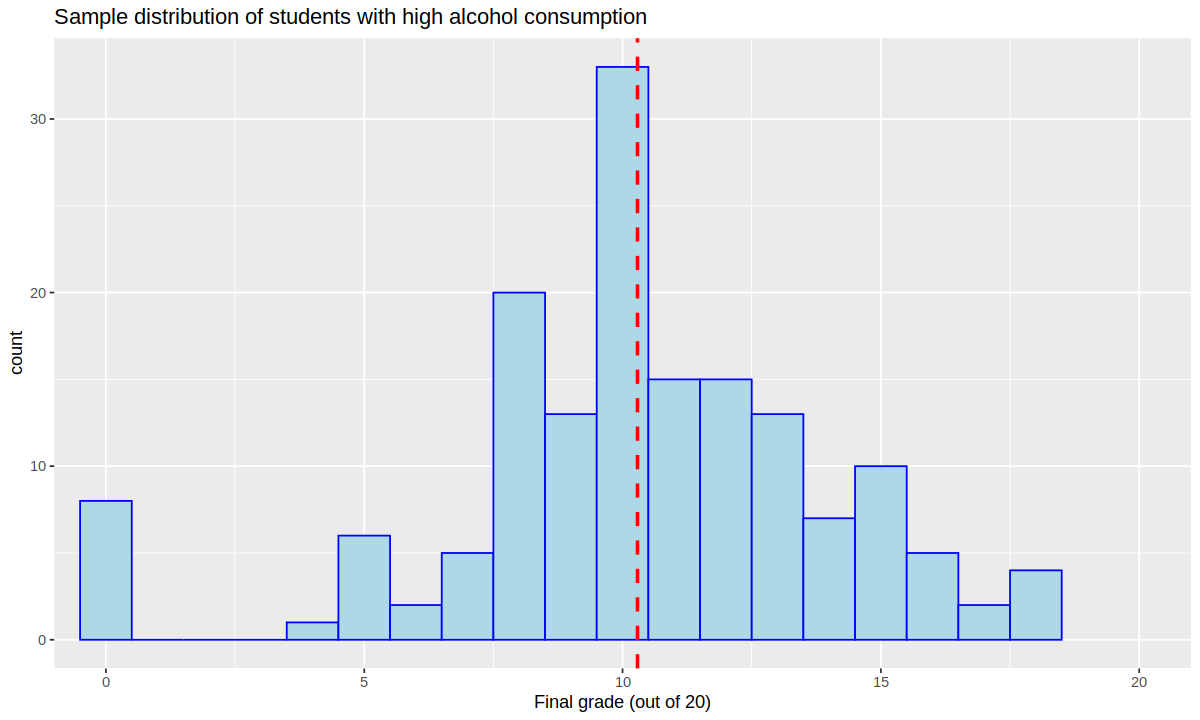

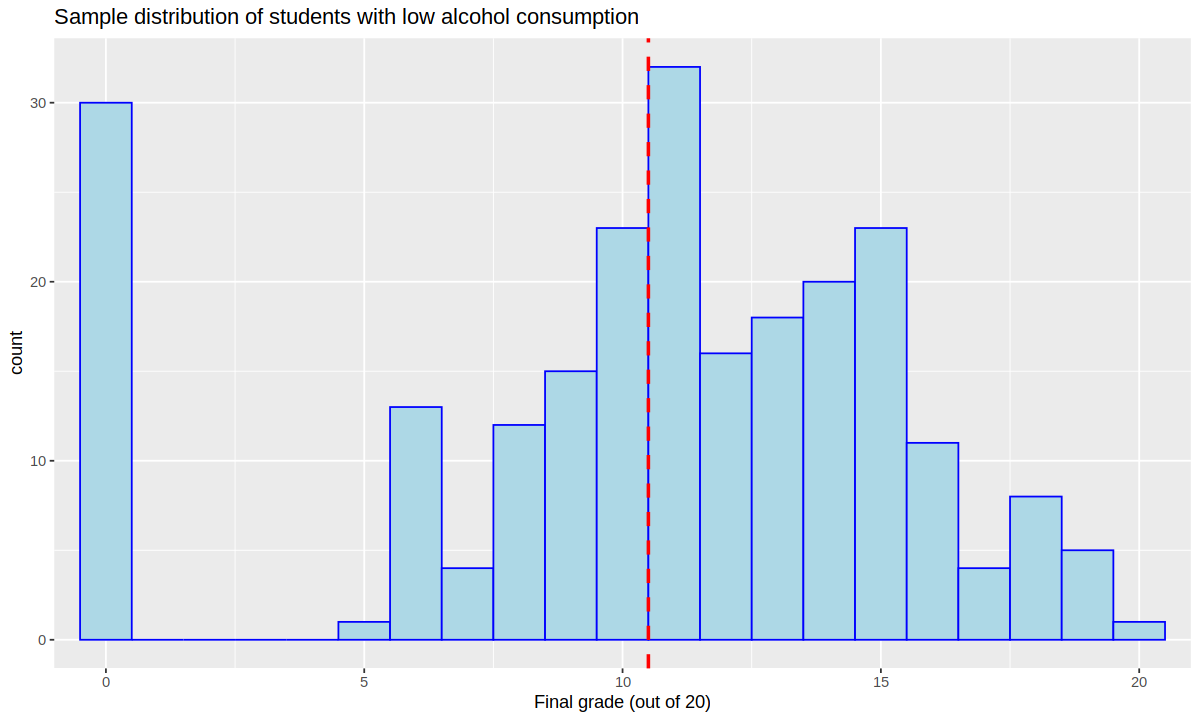

In [5]:
options(repr.plot.width = 10, repr.plot.height = 6)
high_alc_sample_dist <-
    student_data_clean %>%
    filter(high_alc == TRUE) %>%
    ggplot(aes(x = G3)) +
    geom_histogram(binwidth = 1, fill = "lightblue",  color  = "blue") +
    labs(title = "Sample distribution of students with high alcohol consumption", x = "Final grade (out of 20)") +
    geom_vline(aes(xintercept = high_alc_mean), linetype = "dashed", color = "red", linewidth = 1) +
    coord_cartesian(xlim = c(0, 20))



high_alc_sample_dist
    
low_alc_sample_dist <-
    student_data_clean %>%
    filter(high_alc == FALSE) %>%
    ggplot(aes(x = G3)) +
    geom_histogram(binwidth = 1, fill = "lightblue",  color  = "blue") +
    labs(title = "Sample distribution of students with low alcohol consumption", x = "Final grade (out of 20)") +
    geom_vline(aes(xintercept = low_alc_mean), linetype = "dashed", color = "red", linewidth = 1) +
    coord_cartesian(xlim = c(0, 20))

low_alc_sample_dist
    

### Bootstrap Distribution of Both Groups

Taking 1000 bootstrap samples of size 395 (the size of the original sample) with replacement.

In [6]:
bootstrap_low_consumption <- student_data_clean %>% 
     filter(high_alc == FALSE) %>%
     rep_sample_n(size = total_count, reps = 1000, replace = TRUE) %>%
     group_by(replicate) %>%
     summarize(mean_grade = mean(G3))

bootstrap_high_consumption <- student_data_clean %>%
     filter(high_alc == TRUE) %>%
     rep_sample_n(size = total_count, reps= 1000, replace = TRUE) %>%
     group_by(replicate) %>%
     summarize(mean_grade = mean(G3))

bootstrap_low_consumption
bootstrap_high_consumption

replicate,mean_grade
<int>,<dbl>
1,10.44304
2,10.29367
3,10.48354
⋮,⋮
998,10.54684
999,10.71139
1000,10.48101


replicate,mean_grade
<int>,<dbl>
1,10.29114
2,10.25570
3,10.27089
⋮,⋮
998,10.01772
999,10.11899
1000,10.21266


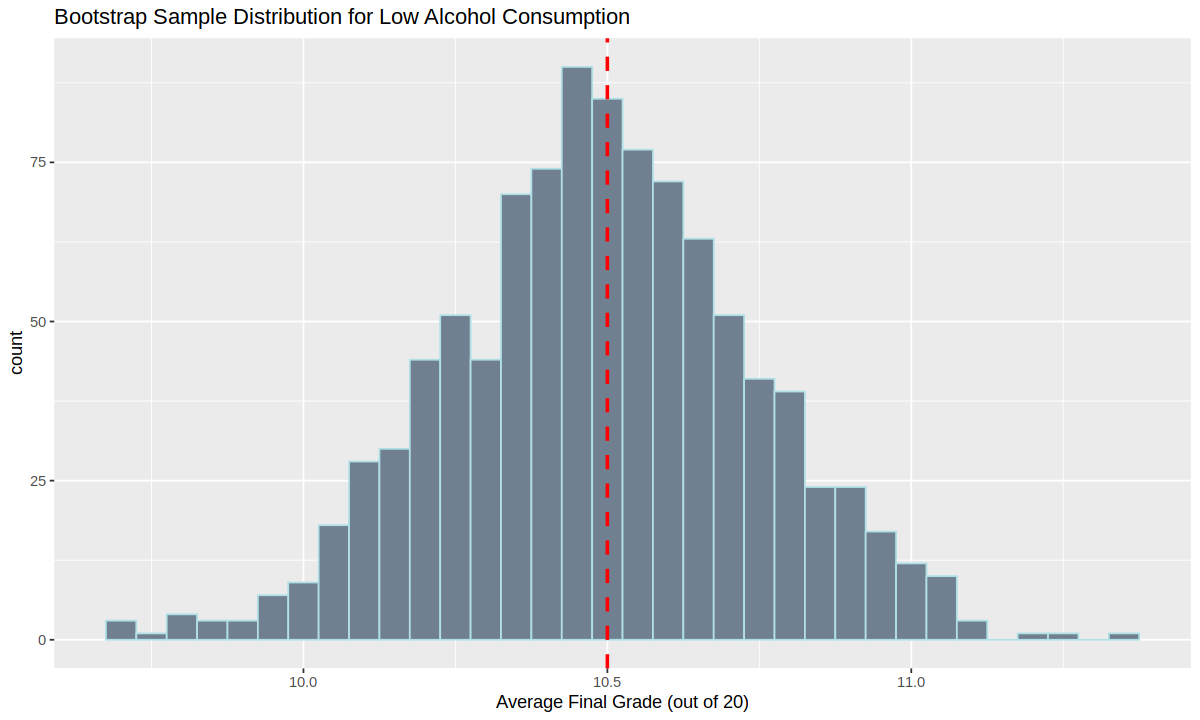

In [7]:
bootstrap_low_consumption_dist <- bootstrap_low_consumption %>% 
         ggplot(aes(x = mean_grade)) + 
         geom_histogram(binwidth = 0.05, fill = "slategray", colour = "powderblue") +
         ggtitle("Bootstrap Sample Distribution for Low Alcohol Consumption") +
         geom_vline(aes(xintercept = low_alc_mean), linetype = "dashed", color = "red", linewidth = 1) +
         xlab("Average Final Grade (out of 20)")

bootstrap_low_consumption_dist

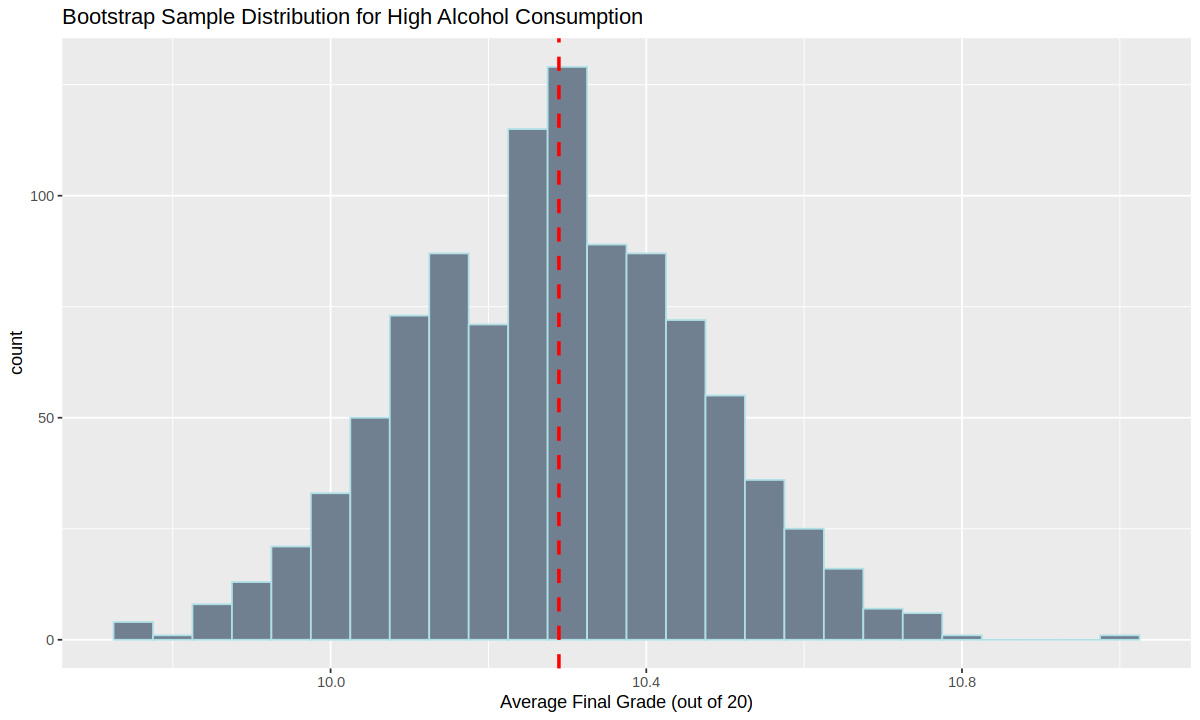

In [8]:
bootstrap_high_consumption_dist <- bootstrap_high_consumption %>% 
         ggplot(aes(x = mean_grade)) + 
         geom_histogram(binwidth = 0.05, fill = "slategray", colour = "powderblue") +
         ggtitle("Bootstrap Sample Distribution for High Alcohol Consumption") +
         geom_vline(aes(xintercept = high_alc_mean), linetype = "dashed", color = "red", linewidth = 1) +
         xlab("Average Final Grade (out of 20)")

bootstrap_high_consumption_dist

# Method

In our project, we aim to investigate grade differences among high school students based on whether they consume high quantities of alcohol during the weekend. Our anticipated result, based on existing literature on alcohol consumption, is that students with higher reported alcohol consumption receive lower grades on average. This may be supported by the preliminary results, which found a lower raw mean final grade among students reporting high alcohol consumption. However, we are interested in determining whether this difference between the two groups of students is statistically significant. We intend to employ hypothesis testing to help us determine whether there exists a statistically significant negative difference among the test scores of students who regularly consume high volumes of alcohol. The null hypothesis proposes that students with high alcohol consumption attain the same grades as students with lower alcohol intake. We intend to use a a fairly liberal alpha value of 0.1, to which the p-value determined during hypothesis testing will be compared to. This value was chosen because the supporting literature on the subject and the limited negative effect that incorrectly rejecting the null hypothesis and committing a Type I error would potentially cause. Our altered hypothesis, based on the preliminary results obtained above, is that the students who report higher alcohol assumption will on average attain lower grades. We also intend to incorporate bootstrapping, with a boostrap distribution already completed for the means as part of the preliminary results. By obtaining a bootstrap confidence interval, we would be able to compare the results to a theory-based confidence interval, making it easier to notice errors and facilitate discussion of the different methods.

$H_0: \mu_1 - \mu_2 = 0$ and $H_a: \mu_1 - \mu_2 < 0$

The results of our research could significantly contribute to the understanding of the impact of alcohol on high school students. Moreover, our findings can play a pivotal role in shaping appropriate policies aimed at regulating alcohol consumption among students within the school. Understanding the relationship between consumption and academic grade enables schools and educators to provide specialized resources such as psychological counseling, which in turn can lead to an improvement in students' academic achievements. Future investigations based on the results (whether students that consumed more alcohol achieved worse grades) could examine other factors that differ between students with higher alcohol consumption, to gain a better picture of the causes and effects of student alcohol consumption.

# References

(1). Michael J. Eckardt, Sandra E. File, et.Effects of Moderate Alcohol Consumption on the Central Nervous System. 30 May 2006. https://doi.org/10.1111/j.1530-0277.1998.tb03695.x

(2). Bushman, B. J., & Cooper, H. M. . Effects of alcohol on human aggression: An intergrative research review. Psychological Bulletin, 107(3), 341–354.(1990). https://doi.org/10.1037/0033-2909.107.3.341

(3). El Ansari W, Stock C, Mills C. Is alcohol consumption associated with poor academic achievement in university students? Int J Prev Med. Oct 2013;4(10):1175-88. PMID: 24319558; PMCID: PMC3843305. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/
